In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Penche'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.632734 0.372073 0.890703 ... 0.318147 0.423723 0.564912]
 [0.649171 0.410222 0.969969 ... 0.334479 0.358332 0.563117]
 [0.655377 0.431736 0.945887 ... 0.342718 0.328286 0.537246]
 ...
 [0.62866  0.505482 0.839337 ... 0.442761 0.32284  0.458389]
 [0.628602 0.508102 0.809137 ... 0.430537 0.320101 0.446278]
 [0.62671  0.497314 0.911519 ... 0.444839 0.312016 0.483267]]
Length: 870


870


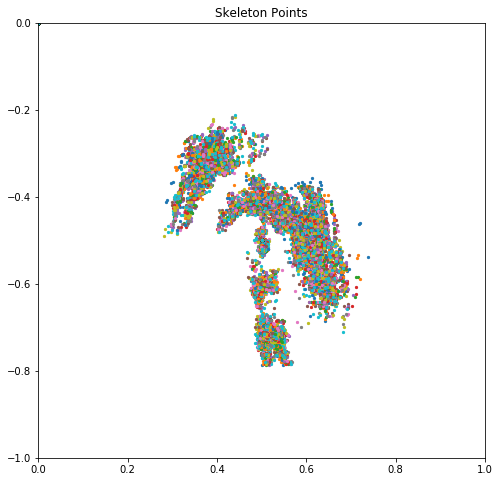

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

870


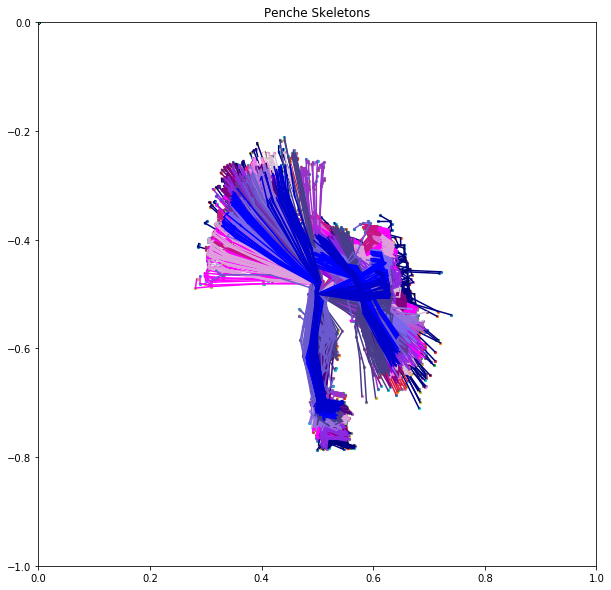

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.632734 0.593841 0.577503 ... 0.285538 0.287504 0.318147]
 [0.649171 0.600126 0.585841 ... 0.306006 0.308047 0.334479]
 [0.655377 0.606288 0.591944 ... 0.318241 0.32228  0.342718]
 ...
 [0.62866  0.58163  0.577619 ... 0.       0.       0.442761]
 [0.628602 0.581642 0.579631 ... 0.420277 0.420353 0.430537]
 [0.62671  0.577638 0.565505 ... 0.434654 0.       0.444839]]
[[-0.372073 -0.418324 -0.401944 ... -0.412723 -0.40733  -0.423723]
 [-0.410222 -0.450935 -0.42646  ... -0.331153 -0.33112  -0.358332]
 [-0.431736 -0.461801 -0.437314 ... -0.303726 -0.303739 -0.328286]
 ...
 [-0.505482 -0.51091  -0.483699 ... -0.       -0.       -0.32284 ]
 [-0.508102 -0.505491 -0.483579 ... -0.279198 -0.282025 -0.320101]
 [-0.497314 -0.502736 -0.478208 ... -0.263045 -0.       -0.312016]]
[[0.632734 0.593841 0.577503 ... 0.285538 0.287504 0.318147]
 [0.649171 0.600126 0.585841 ... 0.306006 0.308047 0.334479]
 [0.655377 0.606288 0.591944 ... 0.318241 0.32228  0.342718]
 ...
 [0.62866  0.58163  0.577619 ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[548.1489700000001, 508.2813330000001, 502.9751349999999, 469.10011900000035, 436.25284800000014, 515.8370800000007, 539.4725119999999, 567.9576430000002, 435.0, 433.7406979999992, 395.44838599999997, 351.0613699999994, 436.67416299999974, 428.3785010000006, 427.88498099999975, 547.1381850000002, 8.823932, 533.1330680000001, 0.0, 440.1705689999998, 416.56579700000015, 411.26642900000013, 302.8143150000001, 272.39403799999974, 337.72711000000027]
[-413.11529000000024, -427.36202000000003, -408.2515279999999, -381.52112500000015, -352.0350399999997, -447.85657299999986, -488.53103799999974, -522.7640669999998, -435.0, -417.8351080000002, -392.7326850000005, -348.72420199999993, -452.51070300000003, -531.0894860000003, -597.4699100000003, -404.2836990000005, -6.9263959999999996, -398.38501600000075, 0.0, -594.8383340000003, -564.462881, -592.1613820000007, -298.46770599999957, -279.8885020000001, -334.7424140000003]
[773.1372029999997, 731.0628609999999, 711.0613950000005, 701.07411600000

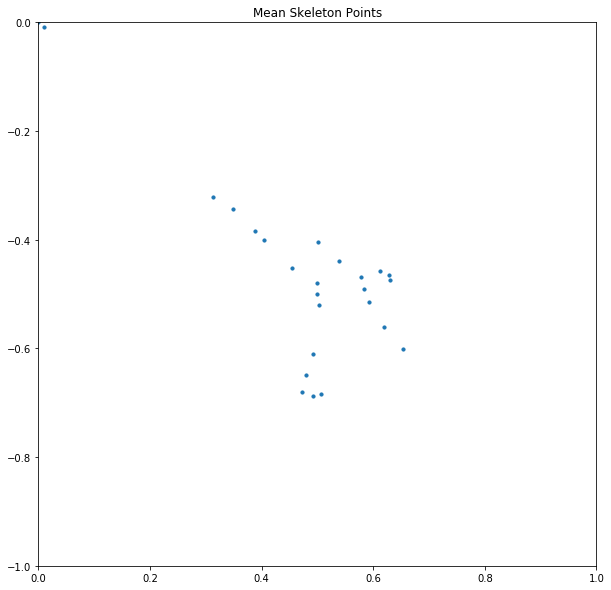

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.011216764625667196, 0.008424501583297087, 0.00929772420098453, 0.012635337463800985, 0.03506258776829815, 0.00938936081240696, 0.016521786961518545, 0.032699712679027555, 0.0, 0.003626132515903222, 0.04732609584245375, 0.07096349376281319, 0.003868870972490088, 0.04277757469287359, 0.0850177766522291, 0.01187409556996567, 0.07937003521780553, 0.01148054720655996, 0.0, 0.12022723288866119, 0.16004474142743683, 0.1194863824598511, 0.1417678160802224, 0.16822097810999942, 0.097620395885352]
Standard Deviations of Y values: [0.035232345998280394, 0.02533366364572641, 0.026049398759813682, 0.02316378825574643, 0.036554426225822854, 0.025339603253145833, 0.030243598998834123, 0.04440056510662868, 0.0, 0.00624838900703862, 0.08146914439908463, 0.14629561200774152, 0.006108539832460341, 0.05662332045086313, 0.12870792555294394, 0.034798241660395766, 0.062491103349156724, 0.03285292238177774, 0.0, 0.16884213153840255, 0.22088238498239188, 0.17766063556498224,

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)